In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import logging
from lvp.models.Agent import Agent
from lvp.models.Parameters import Parameters
from lvp.LBalgorithm import LbAlgorithm
import plotly.graph_objects as go
import plotly
import random
from plotly.subplots import make_subplots
import winsound   
import os
from datetime import datetime

In [2]:
def add_error(df, column_name, num):
    df["Mean"] = df.mean(axis=1)
    for i in range(num):
        df[f"{column_name}_{i}"] = np.power(df[f"{column_name}_{i}"] - df[f"Mean"], 2)
    df["Error"] = np.sqrt(sum([df[f"{column_name}_{i}"] for i in range(num)])/num)
    return df

In [3]:
def logging_custom():
    DEFAULT_CACHE_PATH = "cache/"
    DEFAULT_LOGGS_PATH = DEFAULT_CACHE_PATH + "logs/"
    loggs_id = max(os.listdir(DEFAULT_LOGGS_PATH))
    loggs_path = DEFAULT_LOGGS_PATH + f"{int(loggs_id) + 1}/"
    os.mkdir(loggs_path)
    return loggs_path

In [16]:
generate = True
num_agents = 25

# logging.basicConfig(filename=f'{logging_custom()}_loggs_lvp.log', filemode='w', level=logging.INFO, force=True)
productivity = 5
num_steps = 100
agents = [Agent(id, productivity, generate=generate, num_steps=num_steps) for id in range(num_agents)]

pars = Parameters()
pars.n = num_agents
pars.theta_hat = np.matrix([len(agent.tasks) for agent in agents]).transpose()

def is_neib(i, j):
    if i in [0, num_agents - 1] and i +j == num_agents - 1:
        return 1
    return 1 if abs(i - j) == 1 else 0
    

Adj = np.matrix([[is_neib(i, j) for i in range(num_agents)] for j in range(num_agents)])
W = Adj / 2
# Adj = np.array([
#         [0, 0, 1, 1, 0],
#         [0, 0, 0, 1, 1],
#         [1, 0, 0, 0, 1],
#         [1, 1, 0, 0, 0],
#         [0, 1, 1, 0, 0]
#     ])
# W = Adj / 2
pars.b = W

pars.neib_add = 5
pars.add_neib_val = 0.5

pr = max([max(agent.prods) for agent in agents])
L = (0.5*0.5 * 2) * (num_agents + 1) / pr
pars.params_dict = {
    "L": L,
    "mu": 0.9,
    "h": 0.2,
    "eta": 0.8,
    "gamma": [[0.07, 0.09, 0.11][0]],
    "alpha": [0.07, 0.09, 0.11][1]
}

In [17]:
d_max = 3
1/d_max

0.3333333333333333

In [18]:
# alvp_er = alvp_seq[["Error"]].rename(columns={"Error": "Error_0"})
# lvp_er = lvp_seq[["Error"]].rename(columns={"Error": "Error_0"})
# lvp_er

In [19]:
alvp_er.to_csv(f"trash/exp_{exp}_{today}_alvp.csv")
lvp_er.to_csv(f"trash/exp_{exp}_{today}_lvp.csv")

In [20]:
today = datetime.today().strftime('%Y-%m-%d')

In [21]:
exp = 1
iter_past = 0

Step 0 is completed
Step 1 is completed
Step 2 is completed
Step 3 is completed
Step 4 is completed
Step 5 is completed
Step 6 is completed
Step 7 is completed
Step 8 is completed
Step 9 is completed
Step 10 is completed
Step 11 is completed
Step 12 is completed
Step 13 is completed
Step 14 is completed
Step 15 is completed
Step 16 is completed
Step 17 is completed
Step 18 is completed
Step 19 is completed
Step 20 is completed
Step 21 is completed
Step 22 is completed
Step 23 is completed
Step 24 is completed
Step 25 is completed
Step 26 is completed
Step 27 is completed
Step 28 is completed
Step 29 is completed
Step 30 is completed
Step 31 is completed
Step 32 is completed
Step 33 is completed
Step 34 is completed
Step 35 is completed
Step 36 is completed
Step 37 is completed
Step 38 is completed
Step 39 is completed
Step 40 is completed
Step 41 is completed
Step 42 is completed
Step 43 is completed
Step 44 is completed
Step 45 is completed
Step 46 is completed
Step 47 is completed
St

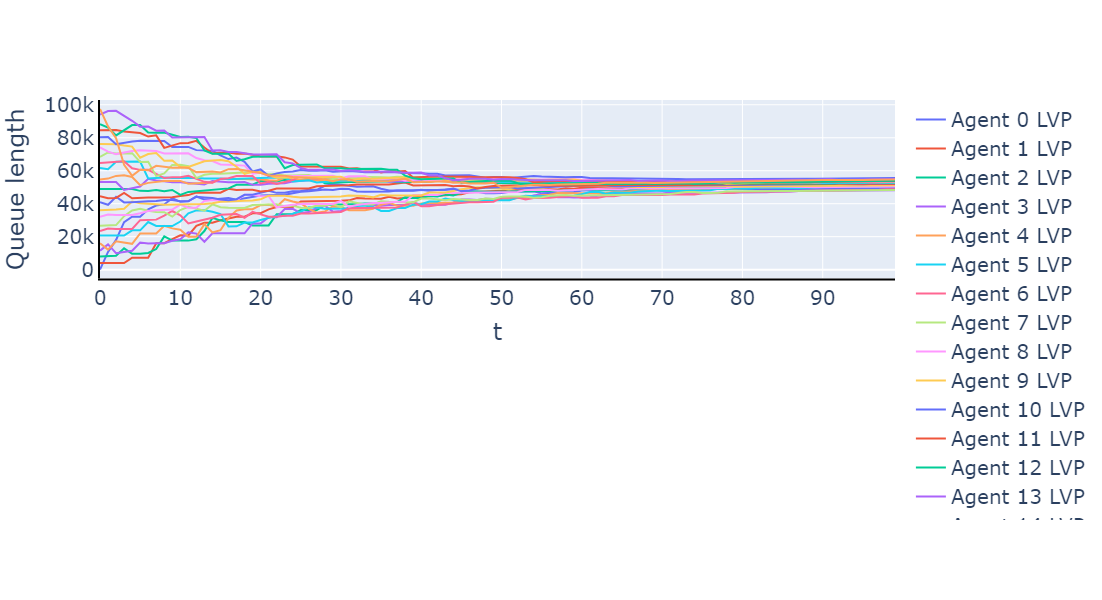

Step 0 is completed
Step 1 is completed
Step 2 is completed
Step 3 is completed
Step 4 is completed
Step 5 is completed
Step 6 is completed
Step 7 is completed
Step 8 is completed
Step 9 is completed
Step 10 is completed
Step 11 is completed
Step 12 is completed
Step 13 is completed
Step 14 is completed
Step 15 is completed
Step 16 is completed
Step 17 is completed
Step 18 is completed
Step 19 is completed
Step 20 is completed
Step 21 is completed
Step 22 is completed
Step 23 is completed
Step 24 is completed
Step 25 is completed
Step 26 is completed
Step 27 is completed
Step 28 is completed
Step 29 is completed
Step 30 is completed
Step 31 is completed
Step 32 is completed
Step 33 is completed
Step 34 is completed
Step 35 is completed
Step 36 is completed
Step 37 is completed
Step 38 is completed
Step 39 is completed
Step 40 is completed
Step 41 is completed
Step 42 is completed
Step 43 is completed
Step 44 is completed
Step 45 is completed
Step 46 is completed
Step 47 is completed
St

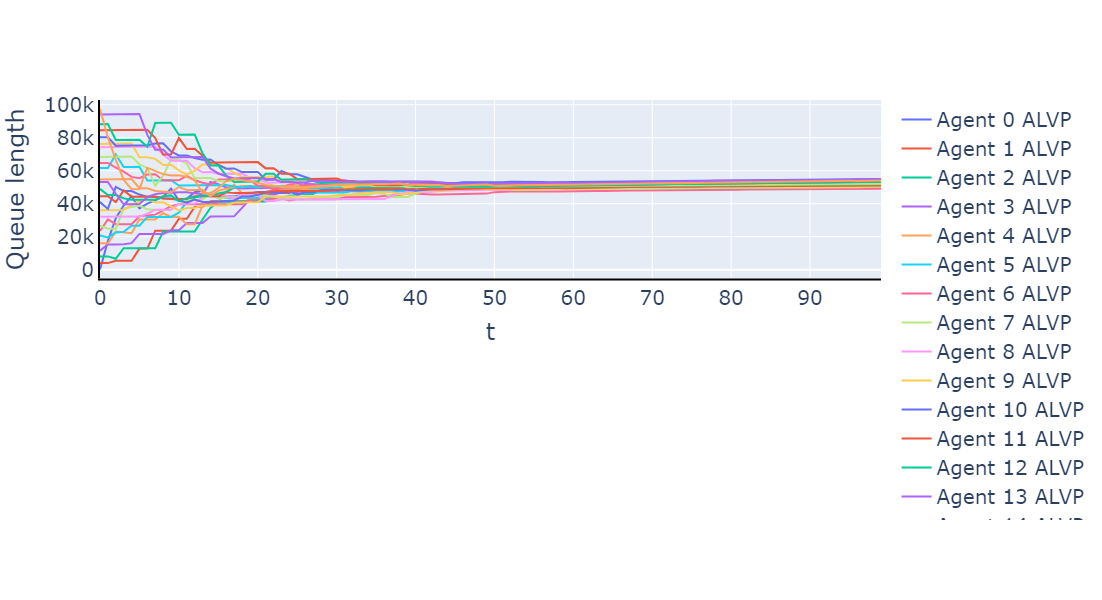

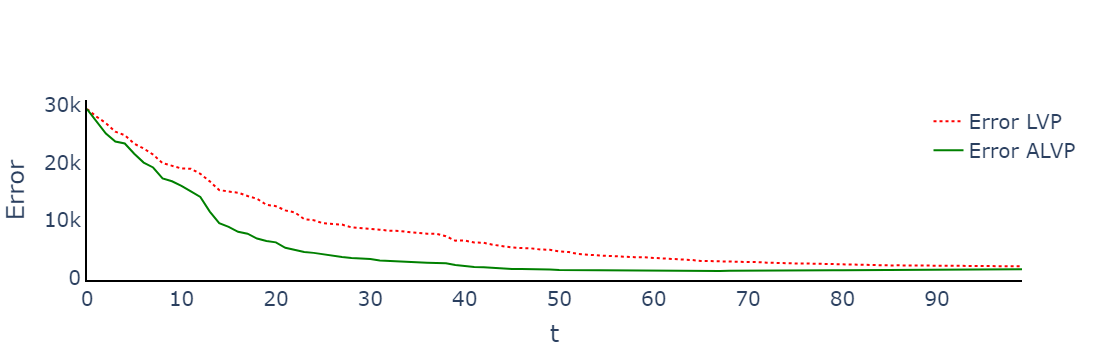

Finish


In [22]:
itr = 1
start = -1

for k in range(iter_past, itr):
    if k > start:
        generate = True
        agents = [Agent(id, productivity, generate=generate, num_steps=num_steps) for id in range(num_agents)]
        alg_lvp = LbAlgorithm(agents=agents, params=pars)
        alg_lvp.run(num_steps=num_steps, accelerate=False, generate=generate)
    
        alg_lvp_seq = alg_lvp.sequence
        lvp_seq_df = pd.DataFrame(alg_lvp_seq, columns=[f"Agent_{ind}" for ind in range(num_agents)])
        lvp_seq_df.to_csv(f"trash/seq/{exp}_{k}_lvp_seq.html")
        del alg_lvp
        del agents
        layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
        fig = make_subplots(rows=2, cols=1)
    
        for i in range(num_agents):
            sequence = [j[i] for j in alg_lvp_seq]
            fig.add_trace(go.Scatter(y=sequence,          
                                     x=list(range(len(sequence))),
                                                 name=f"Agent {i} LVP",
                                                 mode="lines"),
                         row=1, col=1)
    
        fig.update_layout(
            xaxis_title="t",
            yaxis_title="Queue length",
            font = dict(size = 20),
            # width=800,
            height=600,
        )
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
        fig.show()
        fig.write_html(f"trash/trash_{k}_{exp}_lvp_seq.html");
    else:
        lvp_seq_df = pd.read_csv(f"trash/seq/{exp}_{k}_lvp_seq.html")    
    
    if k > start:
        generate = False
        agents = [Agent(id, productivity, generate=generate, num_steps=num_steps) for id in range(num_agents)]
        alg_alvp = LbAlgorithm(agents=agents, params=pars)
        alg_alvp.run(num_steps=num_steps, accelerate=True, generate=generate)
        
        alg_alvp_seq = alg_alvp.sequence
        alvp_seq_df = pd.DataFrame(alg_alvp_seq, columns=[f"Agent_{ind}" for ind in range(num_agents)])
        alvp_seq_df.to_csv(f"trash/seq/{exp}_{k}_alvp_seq.html")
        
        del alg_alvp
        del agents
        layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
        fig = make_subplots(rows=2, cols=1)
    
        for i in range(num_agents):
            sequence = [j[i] for j in alg_alvp_seq]
            fig.add_trace(go.Scatter(y=sequence,          
                                     x=list(range(len(sequence))),
                                                 name=f"Agent {i} ALVP",
                                                 mode="lines"),
                         row=1, col=1)
    
        fig.update_layout(
            xaxis_title="t",
            yaxis_title="Queue length",
            font = dict(size = 20),
            # width=800,
            height=600,
        )
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
        fig.show()
        fig.write_html(f"trash/trash_{k}_{exp}_alvp_seq.html");
    else:
        alvp_seq_df = pd.read_csv(f"trash/seq/{exp}_{k}_alvp_seq.html") 
        
        
    lvp_seq = add_error(lvp_seq_df, "Agent", num_agents);
    alvp_seq = add_error(alvp_seq_df, "Agent", num_agents);

    layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
    fig = go.Figure(layout=layout)

    fig.add_trace(go.Scatter(y=lvp_seq["Error"],
                                         x=list(range(len(lvp_seq))),
                                         name=f"Error LVP",
                                         mode="lines",
                            line={'dash': 'dot', 'color': 'red'}))

    fig.add_trace(go.Scatter(y=alvp_seq["Error"],
                                 x=list(range(len(alvp_seq))),
                                 name=f"Error ALVP",
                                 mode="lines",
                            line={'dash': 'solid', 'color': 'green'}))



    fig.update_layout(
        xaxis_title="t",
        yaxis_title="Error",
        legend = dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.9
        ),
        font = dict(size = 20)
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
    fig.show()
    fig.write_html(f"trash/trash_{k}_{exp}_error.html");

    if k > 0:
        alvp_er[f"Error_{k}"] = alvp_seq
        lvp_er[f"Error_{k}"] = lvp_seq
    else:
        alvp_er = pd.DataFrame(alvp_seq, columns=["Error_0"])
        lvp_er = pd.DataFrame(lvp_seq, columns=["Error_0"])
    
    alvp_er.to_csv(f"trash/exp_{exp}_{today}_alvp.csv")
    lvp_er.to_csv(f"trash/exp_{exp}_{today}_lvp.csv")
            
    
print("Finish")
iter_past = k

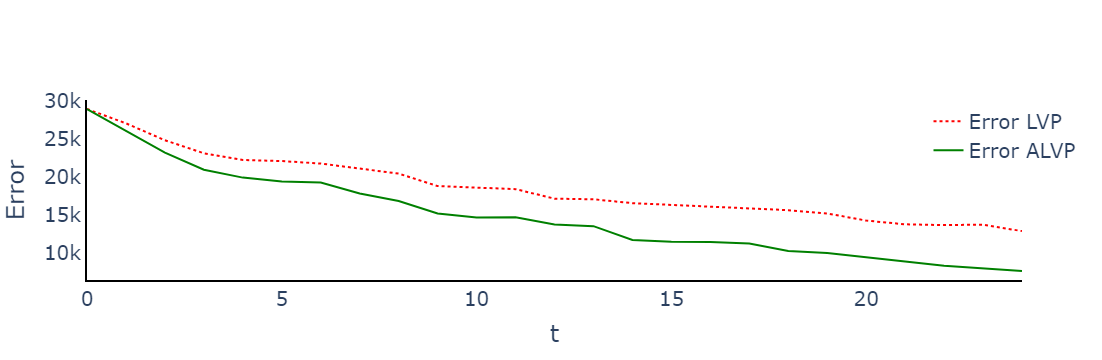

In [15]:
layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(y=lvp_seq["Error"],
                                     x=list(range(len(lvp_seq))),
                                     name=f"Error LVP",
                                     mode="lines",
                        line={'dash': 'dot', 'color': 'red'}))

fig.add_trace(go.Scatter(y=alvp_seq["Error"],
                             x=list(range(len(alvp_seq))),
                             name=f"Error ALVP",
                             mode="lines",
                        line={'dash': 'solid', 'color': 'green'}))



fig.update_layout(
    xaxis_title="t",
    yaxis_title="Error",
    legend = dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.9
    ),
    font = dict(size = 20)
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()
fig.write_html(f"trash/trash_{k}_{exp}_error.html");

if k > 0:
    alvp_er[f"Error_{k}"] = alvp_seq
    lvp_er[f"Error_{k}"] = lvp_seq
else:
    alvp_er = pd.DataFrame(alvp_seq, columns=["Error_0"])
    lvp_er = pd.DataFrame(lvp_seq, columns=["Error_0"])

alvp_er.to_csv(f"trash/exp_{exp}_{today}_alvp.csv")
lvp_er.to_csv(f"trash/exp_{exp}_{today}_lvp.csv")

In [ ]:
exp = 1

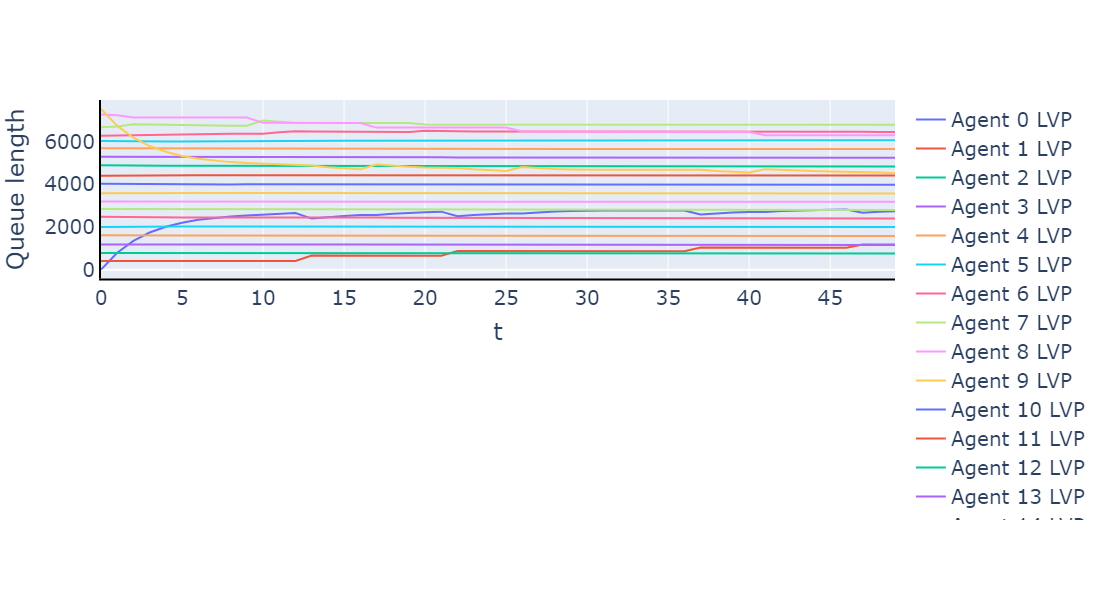

In [11]:
layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = make_subplots(rows=2, cols=1)

for i in range(num_agents):
    sequence = [j[i] for j in alg_lvp.sequence_2]
    fig.add_trace(go.Scatter(y=sequence,          
                             x=list(range(len(sequence))),
                                         name=f"Agent {i} LVP",
                                         mode="lines"),
                 row=1, col=1)
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20),
    # width=800,
    height=600,
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

In [5]:
pr = max([max(agent.prods) for agent in agents])
L = (0.5*0.5 * 2) * (num_agents + 1) / pr
L

1.8903763296074665

In [13]:
res = {}
params = {}
indx = -1

In [14]:
generate = False

def run(mu, eta, alpha, gamma, name, pars):
    # logging.basicConfig(filename=f'{logging_custom()}_loggs_lvp.log', filemode='w', level=logging.INFO, force=True)
    agents = [Agent(id, productivity, generate=generate, num_steps=num_steps) for id in range(num_agents)]
    pars.params_dict = {
        "L": L,
        "mu": mu,
        "h": 0.2,
        "eta": eta,
        "gamma": gamma,
        "alpha": alpha
    }
    alg_alvp = LbAlgorithm(agents=agents, params=pars)
    alg_alvp.run(num_steps=num_steps, accelerate=True, generate_neigh=generate)
    return alg_alvp, pars.params_dict
    
gammas = [0.07, 0.1, 0.2, 0.5, 0.7, 0.9]
alphas = [0.09, 0.2, 0.5, 0.7, 0.9]

# for i in gammas:
#     for j in alphas:
#         try:
#             indx += 1
#             mu, eta = 1, 0.8
#             gamma = [i]
#             alpha = j
#             name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
#             res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)
#         except Exception as e:
#             print(e)
            
#         try:
#             indx += 1
#             mu, eta = 1, 0.9
#             gamma = [i]
#             alpha = j
#             name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
#             res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)
#         except Exception as e:
#             print(e)
        
         
#         try:
#             indx += 1
#             mu, eta = 1, 0.7
#             gamma = [i]
#             alpha = j
#             name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
#             res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)
#         except Exception as e:
#             print(e)
#         break
#     break
        
try:
    indx += 1
    mu, eta = 1, 0.8
    gamma = [[0.07, 0.09, 0.11, 0.5, 0.7, 1][0]]
    alpha = [0.07, 0.09, 0.11, 0.2, 0.3, 0.7][1]
    name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
    res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)
except:
    print("oi")

# indx += 1
# mu, eta = 1.0, 0.4
# gamma = [[0.07, 0.09, 0.11, 0.5, 0.7, 1][2]]
# alpha = [0.07, 0.09, 0.11, 0.2, 0.3, 0.7][1]
# name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
# res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)

# indx += 1
# mu, eta = 1.1, 0.7
# gamma = [[0.07, 0.09, 0.11, 0.5, 0.7, 1][2]]
# alpha = [0.07, 0.09, 0.11, 0.2, 0.3, 0.7][1]
# name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
# res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)

# indx += 1
# mu, eta = 0.9, 0.8
# gamma = [[0.07, 0.09, 0.11, 0.5][2]]
# alpha = [0.07, 0.09, 0.11, 0.2][1]
# name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
# res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)


# indx += 1
# mu, eta = 0.9, 0.7
# gamma = [[0.07, 0.09, 0.11, 0.5][0]]
# alpha = [0.07, 0.09, 0.11, 0.2][1]
# name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
# res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)

# indx += 1
# mu, eta = 0.8, 0.7
# gamma = [[0.07, 0.09, 0.11, 0.5][0]]
# alpha = [0.07, 0.09, 0.11, 0.2][1]
# name = f"{indx}_mu - eta = {round(mu - eta, 2)} gamma {gamma[0]} alpha {alpha}"
# res[name], params[name] = run(mu, eta, alpha, gamma, name, pars)

Step 0 is completed
Step 1 is completed
Step 2 is completed
Step 3 is completed
Step 4 is completed
Step 5 is completed
Step 6 is completed
Step 7 is completed
Step 8 is completed
Step 9 is completed
Step 10 is completed
Step 11 is completed
Step 12 is completed
Step 13 is completed
Step 14 is completed
Step 15 is completed
Step 16 is completed
Step 17 is completed
Step 18 is completed
Step 19 is completed
Step 20 is completed
Step 21 is completed
Step 22 is completed
Step 23 is completed
Step 24 is completed
Step 25 is completed
Step 26 is completed
Step 27 is completed
Step 28 is completed
Step 29 is completed
Step 30 is completed
Step 31 is completed
Step 32 is completed
Step 33 is completed
Step 34 is completed
Step 35 is completed
Step 36 is completed
Step 37 is completed
Step 38 is completed
Step 39 is completed
Step 40 is completed
Step 41 is completed
Step 42 is completed
Step 43 is completed
Step 44 is completed
Step 45 is completed
Step 46 is completed
Step 47 is completed
St

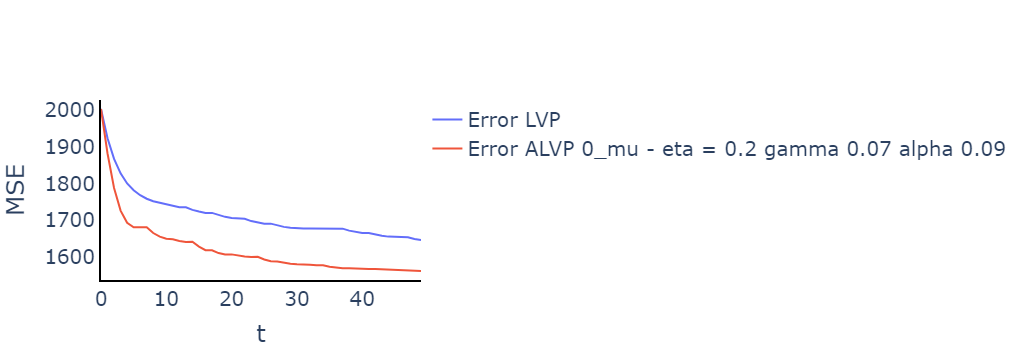

In [15]:
lvp_seq = pd.DataFrame(alg_lvp.sequence_2, columns=[f"Agent_{ind}" for ind in range(num_agents)])
add_error(lvp_seq, "Agent", num_agents);

layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(y=lvp_seq.Error,
                                     x=list(range(len(lvp_seq.Error))),
                                     name=f"Error LVP",
                                     mode="lines"))

for ind, item in res.items():
    alvp_seq = pd.DataFrame(item.sequence_2, columns=[f"Agent_{ind}" for ind in range(num_agents)])
    add_error(alvp_seq, "Agent", num_agents);
    fig.add_trace(go.Scatter(y=alvp_seq.Error,
                                         x=list(range(len(lvp_seq.Error))),
                                         name=f"Error ALVP {ind}",
                                         mode="lines"))
            
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="MSE",
    font = dict(size = 20)
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

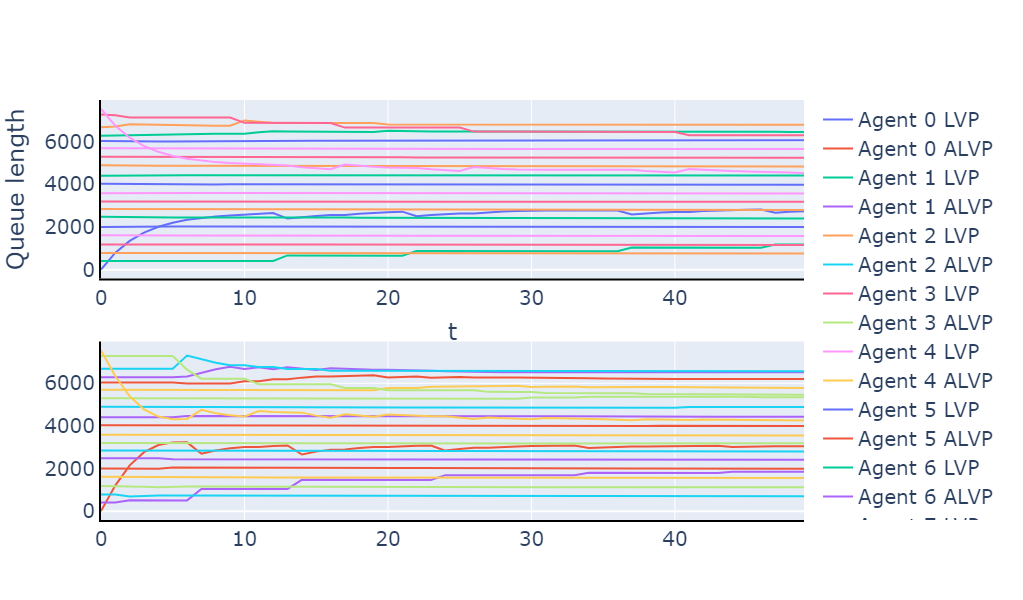

In [16]:
layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = make_subplots(rows=2, cols=1)
alg_alvp = list(res.values())[0]

for i in range(num_agents):
    sequence = [j[i] for j in alg_lvp.sequence_2]
    fig.add_trace(go.Scatter(y=sequence,
          
                             x=list(range(len(sequence))),
                                         name=f"Agent {i} LVP",
                                         mode="lines"),
                 row=1, col=1)
    
    sequence = [j[i] for j in alg_alvp.sequence_2]
    fig.add_trace(go.Scatter(y=sequence,
                                         x=list(range(len(sequence))),
                                         name=f"Agent {i} ALVP",
                                         mode="lines"),
                 row=2, col=1)
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20),
    # width=800,
    height=600,
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

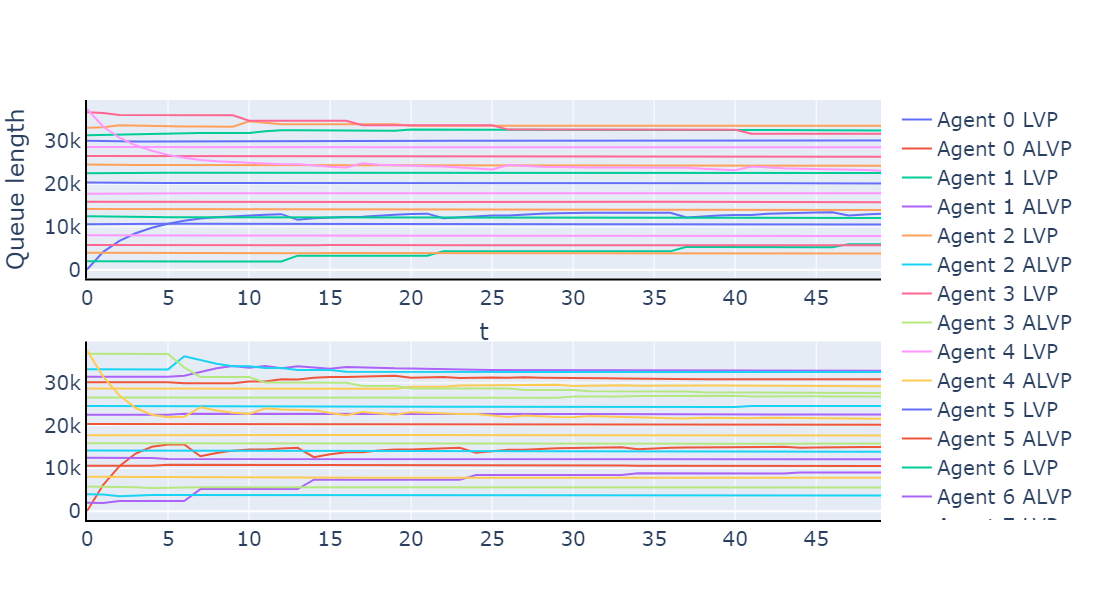

In [17]:
layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = make_subplots(rows=2, cols=1)

for i in range(num_agents):
    sequence = [j[i] for j in alg_lvp.sequence]
    fig.add_trace(go.Scatter(y=sequence,
                                         x=list(range(len(sequence))),
                                         name=f"Agent {i} LVP",
                                         mode="lines"),
                 row=1, col=1)
    
    
    sequence = [j[i] for j in alg_alvp.sequence]
    fig.add_trace(go.Scatter(y=sequence,
                                         x=list(range(len(sequence))),
                                         name=f"Agent {i} ALVP",
                                         mode="lines"),
                 row=2, col=1)
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20),
    height=600,
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

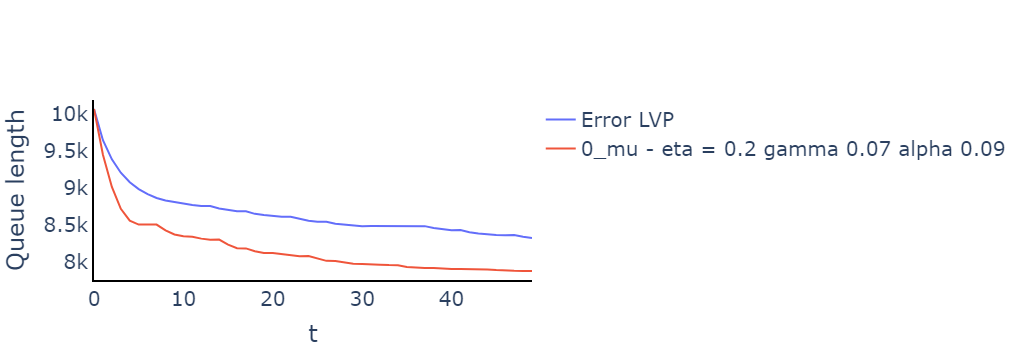

In [18]:
lvp_seq = pd.DataFrame(alg_lvp.sequence, columns=[f"Agent_{ind}" for ind in range(num_agents)])
add_error(lvp_seq, "Agent", num_agents);

layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(y=lvp_seq.Error,
                                     x=list(range(len(lvp_seq.Error))),
                                     name=f"Error LVP",
                                     mode="lines"))


for ind, item in res.items():
    alvp_seq = pd.DataFrame(item.sequence, columns=[f"Agent_{ind}" for ind in range(num_agents)])
    add_error(alvp_seq, "Agent", num_agents);

    fig.add_trace(go.Scatter(y=alvp_seq.Error,
                             x=list(range(len(lvp_seq.Error))),
                             name=f"{name}",
                             mode="lines"))

            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20)
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

In [19]:
import winsound
winsound.Beep(2200, 200)

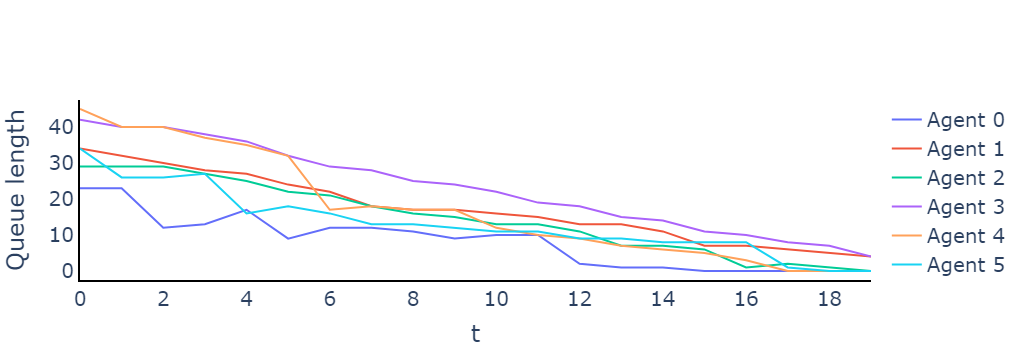

In [14]:
layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(layout=layout)
for i in range(number_of_agents):
    sequence = [j[i] for j in alg_alvp.sequence_2]
    fig.add_trace(go.Scatter(y=sequence,
                                         x=list(range(len(sequence))),
                                         name=f"Agent {i}",
                                         mode="lines"))
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20)
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

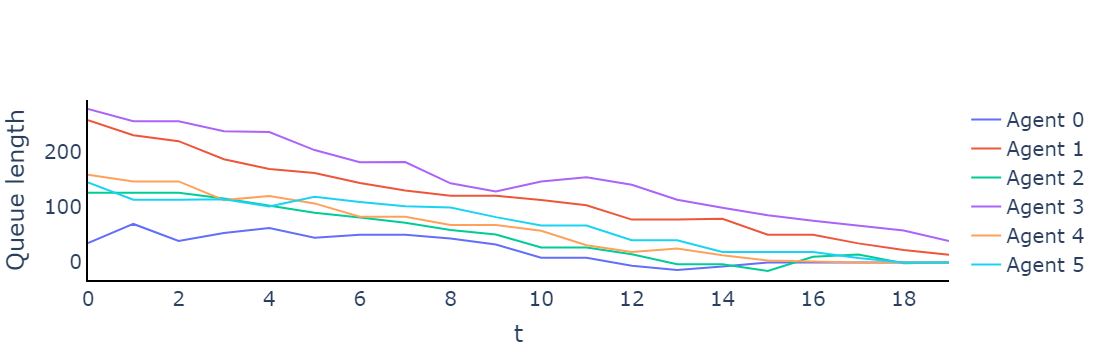

In [15]:
layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(layout=layout)
for i in range(number_of_agents):
    sequence = [j[i] for j in alg_alvp.sequence]
    fig.add_trace(go.Scatter(y=sequence,
                                         x=list(range(len(sequence))),
                                         name=f"Agent {i}",
                                         mode="lines"))
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20)
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

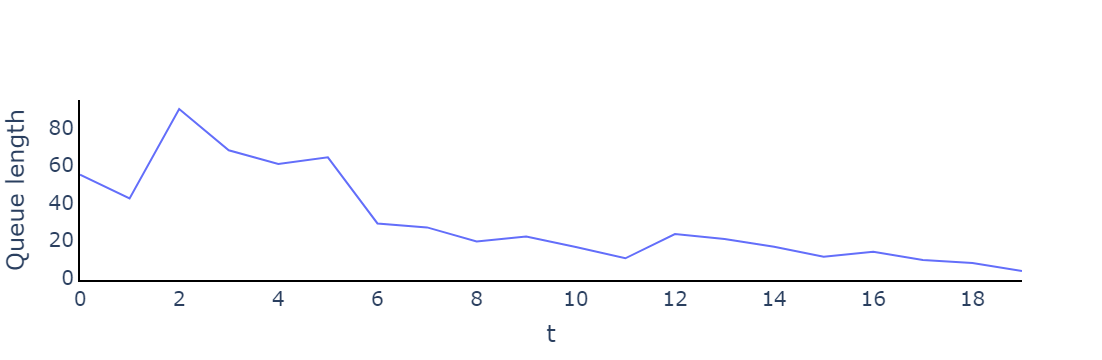

In [16]:
alvp_seq = pd.DataFrame(alg_alvp.sequence_2, columns=["Agent_0", "Agent_1", "Agent_2", "Agent_3", "Agent_4", "Agent_5"])
add_error(alvp_seq, "Agent", 6);

layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(y=alvp_seq.Error,
                                     x=list(range(len(alvp_seq.Error))),
                                     name=f"Error",
                                     mode="lines"))
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20)
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()

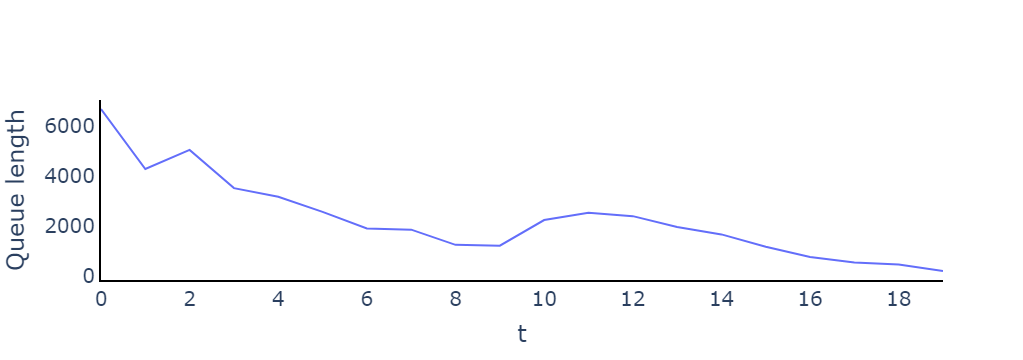

In [17]:
alvp_seq = pd.DataFrame(alg_alvp.sequence, columns=["Agent_0", "Agent_1", "Agent_2", "Agent_3", "Agent_4", "Agent_5"])
add_error(alvp_seq, "Agent", 6);

layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(y=alvp_seq.Error,
                                     x=list(range(len(alvp_seq.Error))),
                                     name=f"Error",
                                     mode="lines"))
            
fig.update_layout(
    xaxis_title="t",
    yaxis_title="Queue length",
    font = dict(size = 20)
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='white')
fig.show()